# <center>MICAS901 - Introduction to Optimization </center>#
# <center> Homework 2 </center>#
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
# Email: amet1900@gmail.com #
# Github: https://github.com/Panongbene #

In [64]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
%matplotlib inline

## IMPORTING DATA 

In [3]:
#load the data
communites_and_crime=pd.read_csv("DATA/communites_and_crime.csv", header = None)#data lecture without name column
household_power_consumption=pd.read_csv("DATA/Household_power_consumption.csv")

In [4]:
#to see the size of the datas
print("Communites and Crime Dataset        = ",communites_and_crime.shape)
print("Hosehold Power Consumption size     = ",household_power_consumption.shape)

Communites and Crime Dataset        =  (1994, 128)
Hosehold Power Consumption size     =  (2075259, 9)


# PREPROCESSING

In [5]:
# Type column Communities and crime
for i in range(communites_and_crime.shape[1]):
    print(communites_and_crime.columns[i],"       ",communites_and_crime.dtypes[i])

0         int64
1         object
2         object
3         object
4         int64
5         float64
6         float64
7         float64
8         float64
9         float64
10         float64
11         float64
12         float64
13         float64
14         float64
15         float64
16         float64
17         float64
18         float64
19         float64
20         float64
21         float64
22         float64
23         float64
24         float64
25         float64
26         float64
27         float64
28         float64
29         float64
30         object
31         float64
32         float64
33         float64
34         float64
35         float64
36         float64
37         float64
38         float64
39         float64
40         float64
41         float64
42         float64
43         float64
44         float64
45         float64
46         float64
47         float64
48         float64
49         float64
50         float64
51         float64
52         float64
53         

In [6]:
# Type column Household Power Consumption
print(household_power_consumption.dtypes)

datetime                  object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
sub_metering_4           float64
dtype: object


In [7]:
#to see the statistique of the testing data
print(communites_and_crime.describe(include="all"))

                0     1     2               3            4            5    \
count   1994.000000  1994  1994            1994  1994.000000  1994.000000   
unique          NaN   109   800            1828          NaN          NaN   
top             NaN     ?     ?  Greenvillecity          NaN          NaN   
freq            NaN  1174  1177               5          NaN          NaN   
mean      28.683551   NaN   NaN             NaN     5.493982     0.057593   
std       16.397553   NaN   NaN             NaN     2.873694     0.126906   
min        1.000000   NaN   NaN             NaN     1.000000     0.000000   
25%       12.000000   NaN   NaN             NaN     3.000000     0.010000   
50%       34.000000   NaN   NaN             NaN     5.000000     0.020000   
75%       42.000000   NaN   NaN             NaN     8.000000     0.050000   
max       56.000000   NaN   NaN             NaN    10.000000     1.000000   

                6            7            8            9    ...          11

In [8]:
#to see the statistique of the testing data
print(household_power_consumption.describe(include="all"))

                   datetime  Global_active_power  Global_reactive_power  \
count               2075259         2.075259e+06           2.075259e+06   
unique              2075259                  NaN                    NaN   
top     2007-01-17 07:37:00                  NaN                    NaN   
freq                      1                  NaN                    NaN   
mean                    NaN         1.089418e+00           1.236871e-01   
std                     NaN         1.054678e+00           1.125933e-01   
min                     NaN         7.600000e-02           0.000000e+00   
25%                     NaN         3.080000e-01           4.800000e-02   
50%                     NaN         6.020000e-01           1.000000e-01   
75%                     NaN         1.526000e+00           1.940000e-01   
max                     NaN         1.112200e+01           1.390000e+00   

             Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
count   2.075259e+06     

### Convert all columns to floats

#### For Communities and Crime

In [9]:
#we build the dictionnary that we will use for encoding the categoricial variable galaxy
_categoricial=communites_and_crime[3].value_counts()
dictionnary_for_encoding__categoricial={}
i=0;
for cle in _categoricial.keys() :
    i=i+1
    dictionnary_for_encoding__categoricial[cle]=i

In [10]:
#We transforme the categorial variable galaxy in integer
wassa=[]
for i in range(communites_and_crime.shape[0]):
    wassa.append(dictionnary_for_encoding__categoricial[communites_and_crime[3][i]])
communites_and_crime[3]=wassa

for i in communites_and_crime.columns:
    communites_and_crime[i] = pd.to_numeric(communites_and_crime[i],errors='coerce')

#### For household power consumption

In [11]:
del household_power_consumption['datetime']

### Replace the missing data by of columns by the means of this column

In [12]:
#Here we replace all missing data by the median value or the next data
communites_and_crime = communites_and_crime.fillna(communites_and_crime.median())

In [13]:
#Here we replace all missing data by the median value or the next data
household_power_consumption=household_power_consumption.fillna(household_power_consumption.median())

## I USE THIS FUNCTION TO DETERMINATE THE EXECUTION TIME

In [14]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## BUILD K FOLD

In [15]:
def divide_data_set(list_index, number_k_fold, randomise_boolean):
    """This function takes as input a list of integers and an integer k and a boolean variable randomise_boolean
    """
    tampon = list_index
    #if(randomise_boolean):
    #    shuffle(tampon)
        
    k_fold_return = dict()
    
    size_k_fold = len(list_index)//number_k_fold

    for i in range(number_k_fold):
        k_fold_return[i] = list_index[i*size_k_fold:(i+1)*size_k_fold]
        
    k_fold_return[i] = list_index[i*size_k_fold:len(list_index)]
    
    return k_fold_return

## Plot Histogram

In [210]:
def plot_hist(k_value, accuracy, title, x_label, y_label):
    """Uses this fonction for to plot histogram"""
    
    plt.figure(figsize=(10,10))
    
    unit = accuracy
 
    plot = plt.bar(k_value, accuracy)
 
    for value in plot:
        height = value.get_height()
        plt.text(value.get_x() + value.get_width()/2., height,'error = %f' % height, ha='center', va='bottom')
 
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(title+'.png')
    # show the graph
    plt.show()

# Part I: Closed-form solutions vs iterative algorithms

## The Optimimal Linear regressor Form for Communities and Crime

In [16]:
communites_and_crime_X = communites_and_crime.drop([127], axis=1)
communites_and_crime_Y = communites_and_crime[127]

In [17]:
A_communities_and_crime  =  (1/communites_and_crime_X.shape[0])*np.dot(communites_and_crime_X.values.T,communites_and_crime_X.values)
B_communities_and_crime  = np.dot(communites_and_crime_X.values.T,communites_and_crime_Y.values)

In [18]:
A_communities_and_crime = A_communities_and_crime + 0.5*np.eye(127)

In [19]:
start_time = timer(None)
#W_communities_and_crime = np.linalg.solve(A_communities_and_crime, B_communities_and_crime)
W_communities_and_crime = (1/communites_and_crime_X.shape[0])*np.dot(np.linalg.inv(A_communities_and_crime), B_communities_and_crime)
timer(start_time)


Time taken: 0 hours 0 minutes and 0.01 seconds.


In [20]:
print(W_communities_and_crime)

[-1.40537168e-03 -7.49626517e-06  1.01200557e-06  9.09579344e-06
  2.81727459e-03  1.05849950e-02  2.51443738e-03  4.00085434e-02
 -2.32488724e-02  1.41696797e-03  8.67600472e-03  3.99291408e-03
  7.19709717e-03  3.80948442e-03  8.89936326e-03  1.08063272e-02
  2.24791856e-02 -8.10095039e-03 -2.18199597e-03 -3.78451532e-03
 -1.05235489e-02  1.00475026e-02  2.48357331e-02  3.97975131e-03
 -7.86452605e-03 -3.60706915e-03  2.62100719e-03 -3.60458807e-03
  8.01205576e-04  2.28041582e-03  2.23760450e-03  6.68813016e-04
  1.23982899e-02  2.23770627e-02  1.49472709e-02  1.95897239e-02
 -4.32062262e-03  2.01922154e-02 -1.72393985e-03  1.50218084e-03
  3.94023721e-03  1.26760711e-02 -2.29180889e-03  2.64657462e-02
  1.39530916e-02  2.56461348e-02  2.72059398e-02  8.53007809e-03
 -1.96360984e-02 -2.14462604e-02 -1.94324991e-02 -1.73745197e-02
  6.19386568e-03  2.49685097e-03  1.15634068e-02  3.86019592e-02
  4.61267334e-03  7.55778597e-03  9.03532460e-03  1.10603532e-02
  1.31678398e-02  7.11265

In [21]:
optimal_linear_regression = (1/communites_and_crime_X.shape[0])*np.linalg.norm(np.dot(communites_and_crime_X.values, W_communities_and_crime)-communites_and_crime_Y.values)+0.5*np.linalg.norm(W_communities_and_crime)

In [22]:
print("Optimale Regression of communities and crime == ", optimal_linear_regression)

Optimale Regression of communities and crime ==  0.07036555561457919


## The Optimimal Linear regressor Form for Individual household Electric Power Consumption

In [23]:
household_power_consumption_X = household_power_consumption.drop(["Global_active_power"], axis=1)
household_power_consumption_Y = household_power_consumption["Global_active_power"]

In [24]:
A_household_power_consumption  =  (1/household_power_consumption_X.shape[0])*np.dot(household_power_consumption_X.values.T,household_power_consumption_X.values)
B_household_power_consumption  = np.dot(household_power_consumption_X.values.T,household_power_consumption_Y.values)

In [25]:
A_household_power_consumption = A_household_power_consumption + 0.5*np.eye(7)

In [26]:
start_time = timer(None)
#W_communities_and_crime = np.linalg.solve(A_communities_and_crime, B_communities_and_crime)
W_household_power_consumption = (1/household_power_consumption_X.shape[0])*np.dot(np.linalg.inv(A_household_power_consumption), B_household_power_consumption)
timer(start_time)


Time taken: 0 hours 0 minutes and 0.0 seconds.


In [27]:
print(W_household_power_consumption)

[-4.91684585e-04  6.74100998e-06  4.52048650e-02  4.78788670e-02
  4.77524664e-02  4.86878169e-02  4.83839119e-02]


In [28]:
optimal_linear_regression_ = (1/household_power_consumption_X.shape[0])*np.linalg.norm(np.dot(household_power_consumption_X.values, W_household_power_consumption)-household_power_consumption_Y.values)+0.5*np.linalg.norm(W_household_power_consumption)

In [29]:
print("Optimale Regression of Household power consuption == ", optimal_linear_regression_)

Optimale Regression of Household power consuption ==  0.05322384502321367


## SIMPLE GRADIENT ALGORITHM

In [30]:
A_household_power_consumption  =  (1/household_power_consumption_X.shape[0])*np.dot(household_power_consumption_X.values.T,household_power_consumption_X.values)
B_household_power_consumption  = (1/household_power_consumption_X.shape[0])*np.dot(household_power_consumption_X.values.T,household_power_consumption_Y.values)

In [31]:
A_household_power_consumption = A_household_power_consumption + 0.5*np.eye(7)

In [32]:
spectral_decomposition = np.linalg.eig(A_household_power_consumption)

In [33]:
L = np.max(spectral_decomposition[0])
mu = np.min(spectral_decomposition[0])

In [34]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
A_household_power_consumption = min_max_scaler.fit_transform(A_household_power_consumption)

In [35]:
alpha = 2/(L+mu)

In [36]:
def gradient_compute(w_k, alpha):
    """This function compute the gradient for l2 loss"""
    kkkkk = 2*alpha*np.dot(A_household_power_consumption, w_k)+2*alpha*B_household_power_consumption
    return kkkkk

In [37]:
epsilon = 0.005
# training error
training_error = list()

training_error_weight = list()

# weight initalization
w = 0.01*np.ones(7)
#w = 0.01*np.eye(7)

In [38]:
k = 0
val_grad = np.linalg.norm(gradient_compute(w, alpha))

while k < 100000 :
    w = w - gradient_compute(w, alpha)
    val_grad = np.linalg.norm(gradient_compute(w, alpha))
    training_error.append(val_grad)
    #print(val_grad)
    k+=1

In [39]:
N = np.arange(len(training_error))

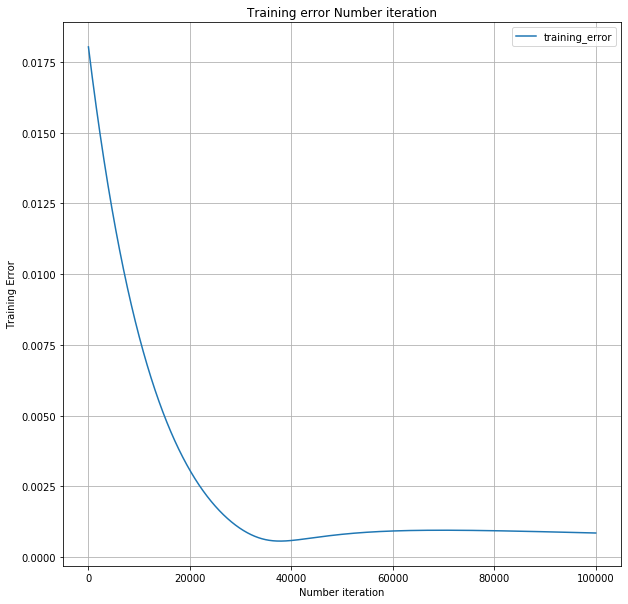

In [40]:
plt.figure(figsize=(10,10))
plt.plot(N,training_error, label="training_error")
plt.grid()

plt.title("Training error Number iteration")
plt.xlabel('Number iteration')
plt.ylabel('Training Error')
plt.legend()
plt.savefig('trainingError.png')

plt.show()

# Part II: Deterministic vs Stochastic algorithms

## Preprocessing data

In [65]:
household_power_consumption_X_II = household_power_consumption.drop(["Global_active_power"], axis=1)
household_power_consumption_Y_II = household_power_consumption["Global_active_power"]

In [66]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
data_X = min_max_scaler.fit_transform(household_power_consumption_X_II)

In [196]:
data_Y = household_power_consumption_Y_II
decision_values = np.median(household_power_consumption_Y_II)
for i in range(len(data_Y)):
    if(data_Y[i]>decision_values):
        data_Y[i] = 1
    else:
        data_Y[i] = -1

## Split data Training and Testing

In [197]:
# size data
size_data = data_X.shape[0]
nb_kfold = 4
# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

training_index = []

for k in range(nb_kfold-1):
    training_index = np.concatenate((training_index, k_fold_index[k]))

training_index = training_index.astype(np.int)
testing_index = k_fold_index[k+1]

training_X = data_X[training_index]
training_Y = data_Y[training_index]
        
testing_X = data_X[testing_index]
testing_Y = data_Y[testing_index]

## Requieres Function

In [86]:
def gradient_g_i(x_i, y_i, w, lamda):
    """This function calculates the gradient of the function gi"""
    
    tampn = np.exp(-y_i*np.dot(w.T, x_i))
    
    tamp =-y_i*tampn/(1+tampn)
    
    return tamp*x_i+2*lamda*w

## Gradient descent(GD)

In [302]:
def gradient_descent_training(data_X, data_Y, lamda, step_size, nb_iteration):
    """This function train the model with GD"""
    
    w = 0.01*np.ones(data_X.shape[1])
    
    loss_function =  list()
    training_error_l2 = list()
    
    for i in range(nb_iteration):
        
        tamp_1 = -data_Y*np.exp(-data_Y*np.dot(data_X, w))/(1+np.exp(-data_Y*np.dot(data_X, w)))
        grade_f = np.sum(tamp_1.values.reshape(data_X.shape[0],1)*data_X)/data_X.shape[0]
        
        w = (1-2*step_size*lamda)*w -step_size*grade_f
                    
        pred = np.dot(data_X,w)
    
        
        training_error_l2.append(np.linalg.norm(pred-data_Y)**2)

        loss_function.append(np.sum(np.log(1+np.exp(-data_Y*np.dot(data_X,w))))/data_X.shape[0]+lamda*np.linalg.norm(w)**2)
            
    return w, loss_function, training_error_l2

In [303]:
start_time = timer(None)

w, loss_function, training_error_l2 = gradient_descent_training(training_X, training_Y, 0.01, 0.001, 1000)

timer(start_time)


Time taken: 0 hours 2 minutes and 55.23 seconds.


In [304]:
#training_error

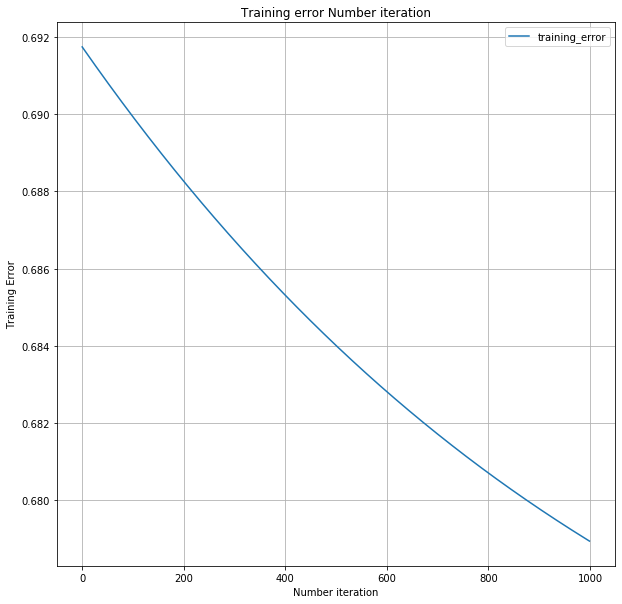

In [305]:
N = np.arange(len(training_error_l2))

plt.figure(figsize=(10,10))
plt.plot(N,training_error_l2, label="training_error")
plt.grid()

plt.title("Training error Number iteration")
plt.xlabel('Number iteration')
plt.ylabel('Training Error')
plt.legend()
plt.savefig('trainingError.png')

plt.show()

#### Cross Validation lamda

In [315]:
# initialization list of parameter to test
nb_kfold = 4
list_parameter_lamda = [0.001, 10, 0.1, 1, 0.21, 5]

step_size = 0.01

# size data
size_data = testing_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_GD = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda)):
    k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

    training_index = []

    for k in range(nb_kfold-1):
        training_index = np.concatenate((training_index, k_fold_index[k]))

    training_index = training_index.astype(np.int)
    testing_index = k_fold_index[k+1]

    training_X_ = testing_X[training_index]
    training_Y_ = testing_Y.iloc[training_index]
        
    testing_X_ = testing_X[testing_index]
    testing_Y_ = testing_Y.iloc[testing_index]
        
    w, loss_function, training_error_l2 = gradient_descent_training(training_X_, training_Y_, list_parameter_lamda[i], step_size, 1000)
        
        #w, loss_function, training_error_l2 = gradient_descent_training(training_X_, training_Y_, list_parameter_lamda[i], step_size, 100)
    tamp_1 = np.sum(np.log(1+np.exp(-testing_Y_*np.dot(testing_X_,w))))/testing_X_.shape[0]+list_parameter_lamda[i]*np.linalg.norm(w)**2
        
    error_cross_validation_lamda_GD.append(tamp_1)

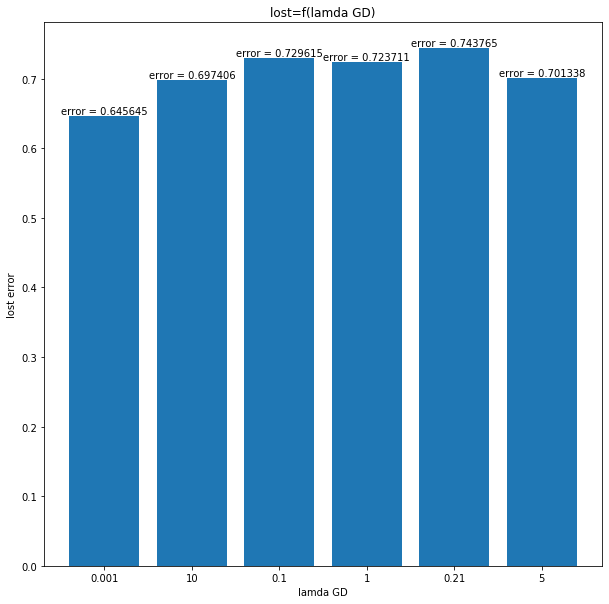

In [316]:
plot_hist(['0.001', '10', '0.1', '1', '0.21', '5'], error_cross_validation_lamda_GD, "lost=f(lamda GD)", "lamda GD", "lost error")

#### Cross Validation Step Size

In [331]:
# initialization list of parameter to test
nb_kfold = 4
list_parameter_lamda = 0.001

list_parameter_step_size = [0.1, 0.0002, 0.03, 0.004, 0.005, 0.6, 1]

# size data
size_data = testing_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_step_size_GD = list()

for i in range(len(list_parameter_step_size)):
    k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

    training_index = []

    for k in range(nb_kfold-1):
        training_index = np.concatenate((training_index, k_fold_index[k]))

    training_index = training_index.astype(np.int)
    testing_index = k_fold_index[k+1]

    training_X_ = testing_X[training_index]
    training_Y_ = testing_Y.iloc[training_index]
        
    testing_X_ = testing_X[testing_index]
    testing_Y_ = testing_Y.iloc[testing_index]
        
    w, loss_function, training_error_l2 = gradient_descent_training(training_X_, training_Y_, list_parameter_lamda, list_parameter_step_size[i], 100)
        
        #w, loss_function, training_error_l2 = gradient_descent_training(training_X_, training_Y_, list_parameter_lamda[i], step_size, 100)
    tamp_1 = np.sum(np.log(1+np.exp(-testing_Y_*np.dot(testing_X_,w))))/testing_X_.shape[0]+list_parameter_lamda*np.linalg.norm(w)**2
        
    error_cross_validation_step_size_GD.append(tamp_1)

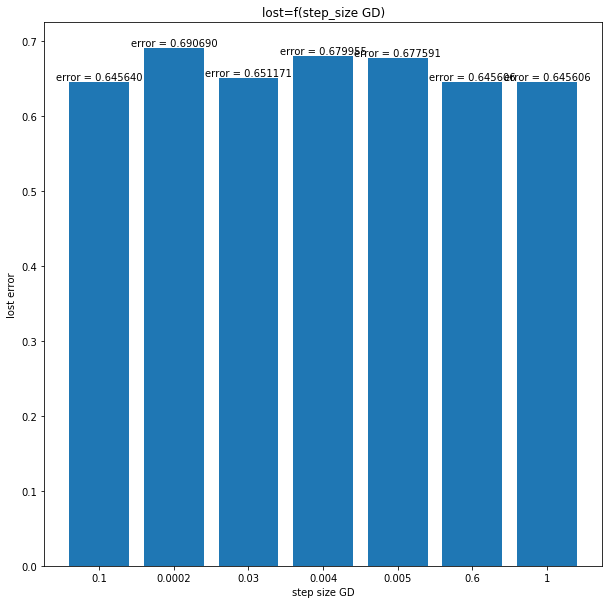

In [332]:
plot_hist(['0.1', '0.0002', '0.03', '0.004', '0.005', '0.6', '1'], error_cross_validation_step_size_GD, "lost=f(step_size GD)", "step size GD", "lost error")

## Plain Stochastic Gradient Descent

In [429]:
def stocastic_gradient_descent_training(data_X_, data_Y_, lamda, step_size, size_batch, nb_iteration):
    """This function train the model with GD"""
    
    w = 0.01*np.ones(data_X_.shape[1])
    
    loss_function =  list()
    training_error_l2 = list()
    
    
    for i in range(nb_iteration):
        
        batch_list = [np.random.randint(0,data_X_.shape[0])%data_X_.shape[0] for i in range(size_batch)]
        data_Y = data_Y_[batch_list]
        data_X = data_X_[batch_list]
        
        tamp_1 = -data_Y*np.exp(-data_Y*np.dot(data_X, w))/(1+np.exp(-data_Y*np.dot(data_X, w)))
        grade_f = np.sum(tamp_1.values.reshape(data_X.shape[0],1)*data_X)/data_X.shape[0]
        
        w = (1-2*step_size*lamda)*w -step_size*grade_f
                    
        pred = np.dot(data_X,w)
    
        
        training_error_l2.append(np.linalg.norm(pred-data_Y)**2)

        loss_function.append(np.sum(np.log(1+np.exp(-data_Y*np.dot(data_X,w))))/data_X.shape[0]+lamda*np.linalg.norm(w)**2)
            
    return w, loss_function, training_error_l2

In [349]:
start_time = timer(None)

w, loss_function, training_error_l2 = stocastic_gradient_descent_training(training_X, training_Y, 0.01, 0.001, training_X.shape[0]//4, 100)

timer(start_time)


Time taken: 0 hours 6 minutes and 5.02 seconds.


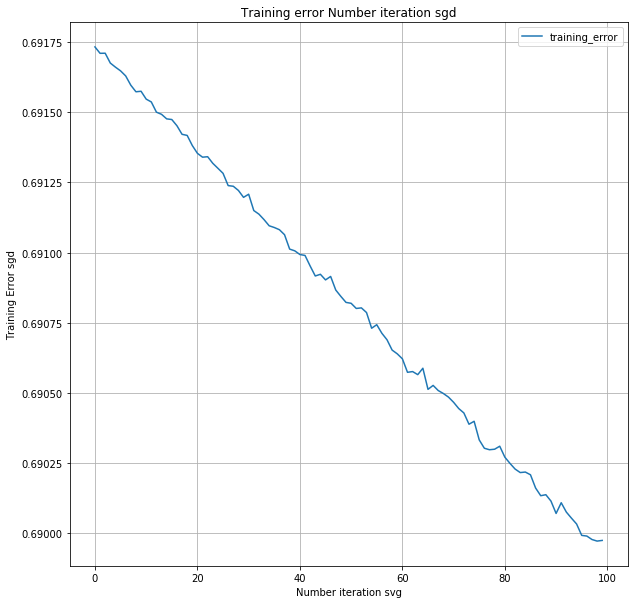

In [350]:
N = np.arange(len(loss_function))

plt.figure(figsize=(10,10))
plt.plot(N,loss_function, label="training_error")
plt.grid()

plt.title("Training error Number iteration sgd")
plt.xlabel('Number iteration svg')
plt.ylabel('Training Error sgd')
plt.legend()
plt.savefig('trainingErrorsgd.png')

plt.show()

#### Cross Validation with lamda

In [423]:
# initialization list of parameter to test
nb_kfold = 4
list_parameter_lamda = [0.001, 10, 0.1, 1, 0.21, 5]

step_size = 0.01

# size data
size_data = testing_X.shape[0]
batch_size = 1

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_GD = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda)):
    k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

    training_index = []

    for k in range(nb_kfold-1):
        training_index = np.concatenate((training_index, k_fold_index[k]))

    training_index = training_index.astype(np.int)
    testing_index = k_fold_index[k+1]

    training_X_ = testing_X[training_index]
    training_Y_ = testing_Y.iloc[training_index].reset_index().drop(columns=['index'])['Global_active_power']
    
    testing_X_ = testing_X[testing_index]
    testing_Y_ = testing_Y.iloc[testing_index]

    w, loss_function, training_error_l2 = stocastic_gradient_descent_training(training_X_, training_Y_, list_parameter_lamda[i], step_size, batch_size, 100)
        
    tamp_1 = np.sum(np.log(1+np.exp(-testing_Y_*np.dot(testing_X_,w))))/testing_X_.shape[0]+list_parameter_lamda[i]*np.linalg.norm(w)**2
        
    error_cross_validation_lamda_GD.append(tamp_1)

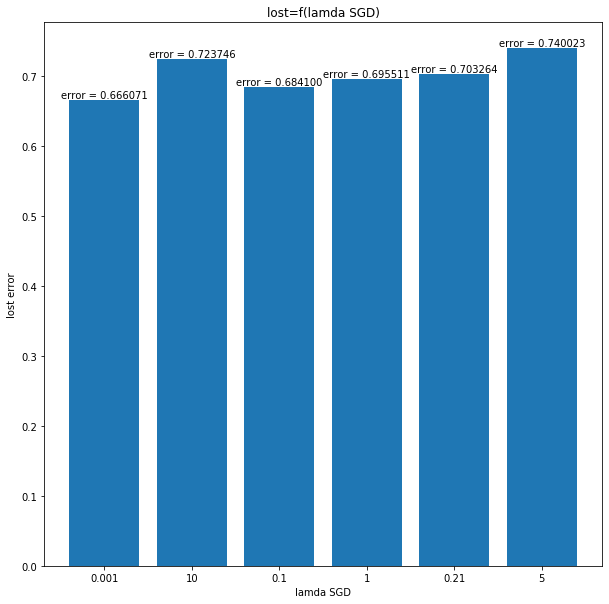

In [424]:
plot_hist(['0.001', '10', '0.1', '1', '0.21', '5'], error_cross_validation_lamda_GD, "lost=f(lamda SGD)", "lamda SGD", "lost error")

#### Cross Validation with step size

In [431]:
# initialization list of parameter to test
nb_kfold = 4
list_parameter_lamda = 0.01

list_parameter_step_size = [0.1, 0.0002, 0.03, 0.004, 0.005, 0.6, 1]

# size data
size_data = testing_X.shape[0]
batch_size = 1

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_step_size_GD = list()
#error_k_fold = list()
for i in range(len(list_parameter_step_size)):
    k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

    training_index = []

    for k in range(nb_kfold-1):
        training_index = np.concatenate((training_index, k_fold_index[k]))

    training_index = training_index.astype(np.int)
    testing_index = k_fold_index[k+1]

    training_X_ = testing_X[training_index]
    training_Y_ = testing_Y.iloc[training_index].reset_index().drop(columns=['index'])['Global_active_power']
        
    testing_X_ = testing_X[testing_index]
    testing_Y_ = testing_Y.iloc[testing_index]
        
    w, loss_function, training_error_l2 = stocastic_gradient_descent_training(training_X_, training_Y_, list_parameter_lamda, list_parameter_step_size[i], batch_size, 100)
        
    tamp_1 = np.sum(np.log(1+np.exp(-testing_Y_*np.dot(testing_X_,w))))/testing_X_.shape[0]+list_parameter_lamda*np.linalg.norm(w)**2
        
    error_cross_validation_step_size_GD.append(tamp_1)

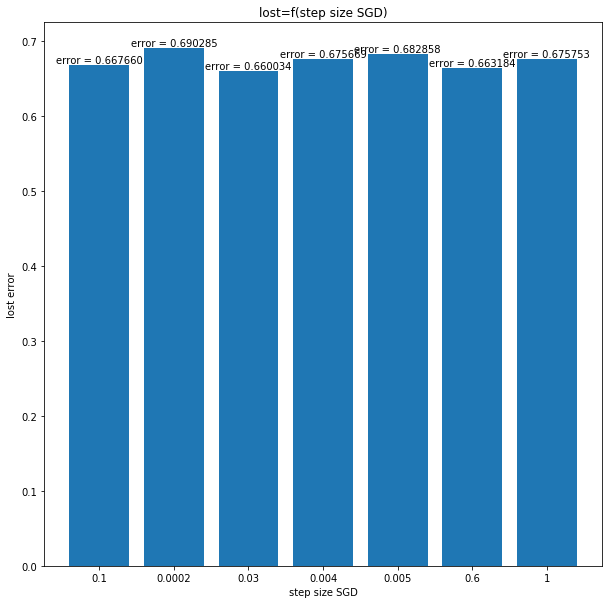

In [432]:
plot_hist(['0.1', '0.0002', '0.03', '0.004', '0.005', '0.6', '1'], error_cross_validation_step_size_GD, "lost=f(step size SGD)", "step size SGD", "lost error")

## SVRG

In [442]:
def svrg_gradient_descent_training(data_X, data_Y, lamda, step_size, size_batch, epoch, nb_iteration):
    """This function train the model with GD"""
    
    w = 0.01*np.ones(data_X.shape[1])
    
    loss_function =  list()
    training_error_l2 = list()
    
    
    for i in range(nb_iteration):
        
        #batch_list = [np.random.randint(0,data_X_.shape[0])%data_X_.shape[0] for i in range(size_batch)]
        #data_Y = data_Y_[batch_list]
        #data_X = data_X_[batch_list]
        
        tamp_1 = -data_Y*np.exp(-data_Y*np.dot(data_X, w))/(1+np.exp(-data_Y*np.dot(data_X, w)))
        grade_f = np.sum(tamp_1.values.reshape(data_X.shape[0],1)*data_X)/data_X.shape[0]
        
        w_k_0 = w
        
        for k in range(epoch):
            batch_list = [np.random.randint(0,data_X.shape[0])%data_X.shape[0] for i in range(size_batch)]
            data_Y_ = data_Y[batch_list]
            data_X_ = data_X[batch_list]
        
            
            tamp_1_k_0 = -data_Y_*np.exp(-data_Y_*np.dot(data_X_, w_k_0))/(1+np.exp(-data_Y_*np.dot(data_X_, w_k_0)))
            grade_f_k_0 = np.sum(tamp_1_k_0.values.reshape(data_X_.shape[0],1)*data_X_)/data_X_.shape[0]
            
            tamp_1_k = -data_Y_*np.exp(-data_Y_*np.dot(data_X_, w))/(1+np.exp(-data_Y_*np.dot(data_X_, w)))
            grade_f_k = np.sum(tamp_1_k.values.reshape(data_X_.shape[0],1)*data_X_)/data_X_.shape[0]
        
            w_k_0 = w_k_0 - step_size*(grade_f_k_0+grade_f-grade_f_k)
        
        w = w_k_0
                    
        pred = np.dot(data_X,w)
    
        
        training_error_l2.append(np.linalg.norm(pred-data_Y)**2)

        loss_function.append(np.sum(np.log(1+np.exp(-data_Y*np.dot(data_X,w))))/data_X.shape[0]+lamda*np.linalg.norm(w)**2)
            
    return w, loss_function, training_error_l2

In [445]:
start_time = timer(None)

w, loss_function, training_error_l2 = svrg_gradient_descent_training(training_X, training_Y, 0.01, 0.01, 1, 5, 60)

timer(start_time)


Time taken: 0 hours 0 minutes and 12.18 seconds.


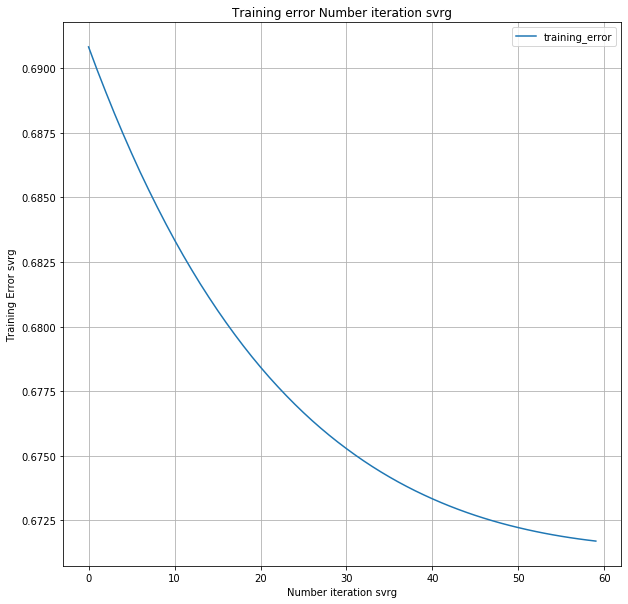

In [446]:
N = np.arange(len(loss_function))

plt.figure(figsize=(10,10))
plt.plot(N,loss_function, label="training_error")
plt.grid()

plt.title("Training error Number iteration svrg")
plt.xlabel('Number iteration svrg')
plt.ylabel('Training Error svrg')
plt.legend()
plt.savefig('trainingErrorsvrg.png')

plt.show()

#### Cross Validation with lamda

In [449]:
# initialization list of parameter to test
nb_kfold = 4
list_parameter_lamda = [0.001, 10, 0.1, 1, 0.21, 5]

step_size = 0.01
size_epoch = 5
batch_size = 1

# size data
size_data = testing_X.shape[0]


# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_SVRG = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda)):
    k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

    training_index = []

    for k in range(nb_kfold-1):
        training_index = np.concatenate((training_index, k_fold_index[k]))

    training_index = training_index.astype(np.int)
    testing_index = k_fold_index[k+1]

    training_X_ = testing_X[training_index]
    training_Y_ = testing_Y.iloc[training_index].reset_index().drop(columns=['index'])['Global_active_power']
    
    testing_X_ = testing_X[testing_index]
    testing_Y_ = testing_Y.iloc[testing_index]

    w, loss_function, training_error_l2 = svrg_gradient_descent_training(training_X, training_Y, list_parameter_lamda[i], step_size, batch_size, size_epoch, 60)
    
    tamp_1 = np.sum(np.log(1+np.exp(-testing_Y_*np.dot(testing_X_,w))))/testing_X_.shape[0]+list_parameter_lamda[i]*np.linalg.norm(w)**2
        
    error_cross_validation_lamda_SVRG.append(tamp_1)

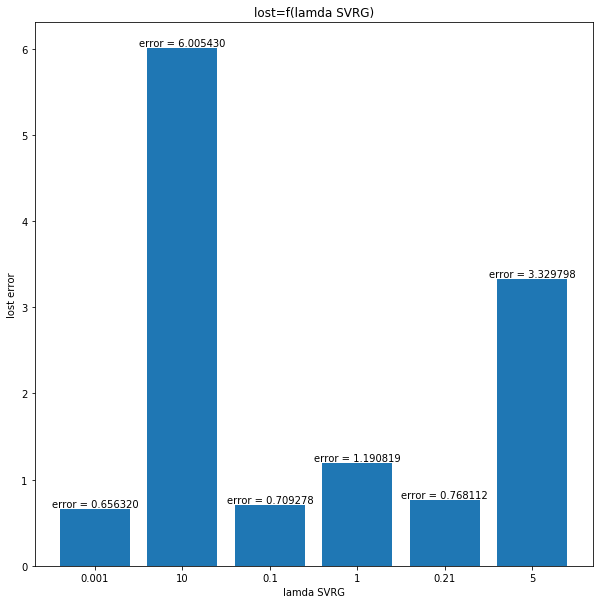

In [450]:
plot_hist(['0.001', '10', '0.1', '1', '0.21', '5'], error_cross_validation_lamda_SVRG, "lost=f(lamda SVRG)", "lamda SVRG", "lost error")

#### Cross Validation with step size

In [452]:
# initialization list of parameter to test
nb_kfold = 4
list_parameter_lamda = 0.001

list_parameter_step_size = [0.01, 0.0002, 0.00001, 0.004, 0.005, 0.006]
size_epoch = 5
batch_size = 1

# size data
size_data = testing_X.shape[0]


# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_step_size_SVRG = list()
#error_k_fold = list()
for i in range(len(list_parameter_step_size)):
    k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

    training_index = []

    for k in range(nb_kfold-1):
        training_index = np.concatenate((training_index, k_fold_index[k]))

    training_index = training_index.astype(np.int)
    testing_index = k_fold_index[k+1]

    training_X_ = testing_X[training_index]
    training_Y_ = testing_Y.iloc[training_index].reset_index().drop(columns=['index'])['Global_active_power']
    
    testing_X_ = testing_X[testing_index]
    testing_Y_ = testing_Y.iloc[testing_index]

    w, loss_function, training_error_l2 = svrg_gradient_descent_training(training_X, training_Y, list_parameter_lamda, list_parameter_step_size[i], batch_size, size_epoch, 60)
    
    tamp_1 = np.sum(np.log(1+np.exp(-testing_Y_*np.dot(testing_X_,w))))/testing_X_.shape[0]+list_parameter_lamda*np.linalg.norm(w)**2
        
    error_cross_validation_step_size_SVRG.append(tamp_1)

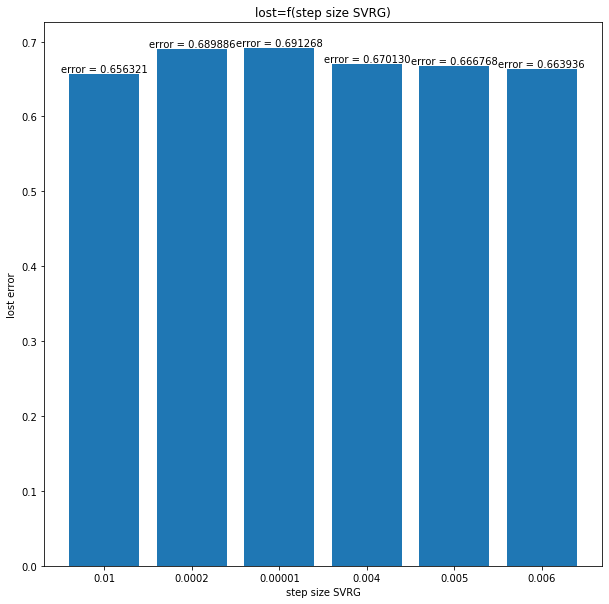

In [453]:
plot_hist(['0.01', '0.0002', '0.00001', '0.004', '0.005', '0.006'], error_cross_validation_step_size_SVRG, "lost=f(step size SVRG)", "step size SVRG", "lost error")

#### Cross Validation with epoch

In [454]:
# initialization list of parameter to test
nb_kfold = 4
list_parameter_lamda = 0.001

list_parameter_step_size = 0.01
size_epoch = [5, 10, 20, 50, 100]
batch_size = 1

# size data
size_data = testing_X.shape[0]


# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_epoch_SVRG = list()
#error_k_fold = list()
for i in range(len(size_epoch)):
    k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

    training_index = []

    for k in range(nb_kfold-1):
        training_index = np.concatenate((training_index, k_fold_index[k]))

    training_index = training_index.astype(np.int)
    testing_index = k_fold_index[k+1]

    training_X_ = testing_X[training_index]
    training_Y_ = testing_Y.iloc[training_index].reset_index().drop(columns=['index'])['Global_active_power']
    
    testing_X_ = testing_X[testing_index]
    testing_Y_ = testing_Y.iloc[testing_index]

    w, loss_function, training_error_l2 = svrg_gradient_descent_training(training_X, training_Y, list_parameter_lamda, list_parameter_step_size, batch_size, size_epoch[i], 60)
    
    tamp_1 = np.sum(np.log(1+np.exp(-testing_Y_*np.dot(testing_X_,w))))/testing_X_.shape[0]+list_parameter_lamda*np.linalg.norm(w)**2
        
    error_cross_validation_epoch_SVRG.append(tamp_1)

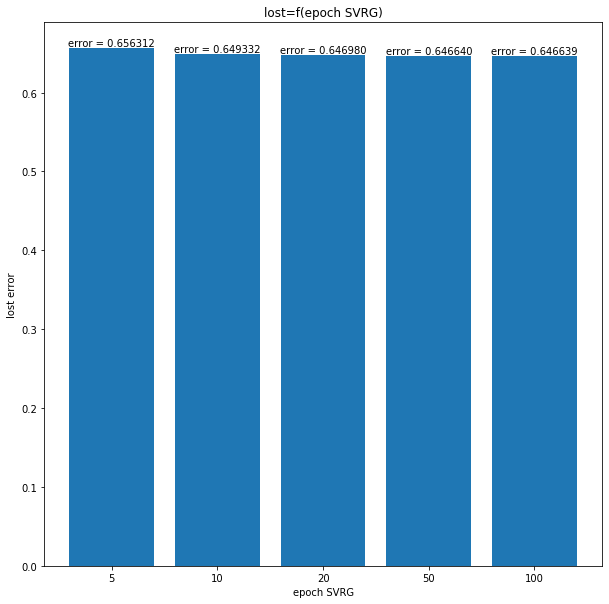

In [455]:
plot_hist(['5', '10', '20', '50', '100'], error_cross_validation_epoch_SVRG, "lost=f(epoch SVRG)", "epoch SVRG", "lost error")

## Compare Training Error 

In [466]:
w_gd, loss_function_gd, training_error_l2_gd = gradient_descent_training(training_X, training_Y, 0.01, 0.01, 100)

In [473]:
w_sgd, loss_function_sgd, training_error_l2_sgd = stocastic_gradient_descent_training(training_X, training_Y, 0.01, 0.01, 10, 100)

In [468]:
w_svrg, loss_function_svrg, training_error_l2_svrg = svrg_gradient_descent_training(training_X, training_Y, 0.01, 0.01, 1, 5, 100)

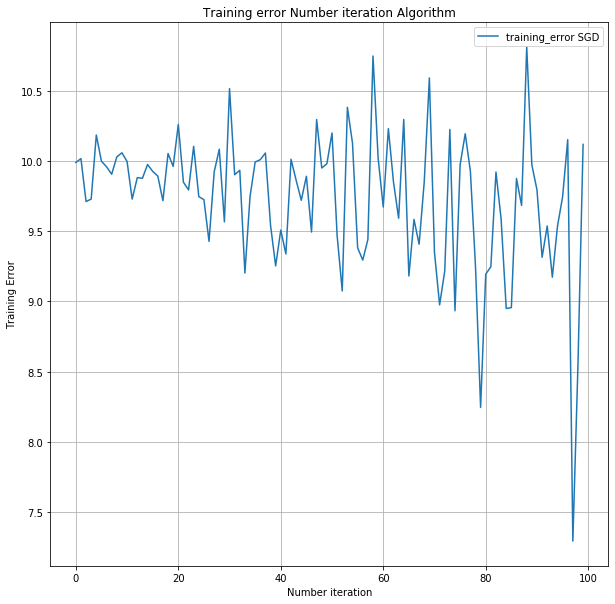

In [477]:
N = np.arange(len(training_error_l2_sgd))

plt.figure(figsize=(10,10))

#plt.plot(N,training_error_l2_gd, label="training_error GD")
plt.plot(N,training_error_l2_sgd, label="training_error SGD")
#plt.plot(N,training_error_l2_svrg, label="training_error SVRG")

plt.grid()

plt.title("Training error Number iteration Algorithm")
plt.xlabel('Number iteration')
plt.ylabel('Training Error')
plt.legend()
plt.savefig('trainingalgorithm.png')

plt.show()

## Test Error

In [463]:
testing_error_l2_gd = np.linalg.norm(np.dot(data_X,w_gd)-data_Y)**2
testing_error_l2_sgd = np.linalg.norm(np.dot(data_X,w_sgd)-data_Y)**2
testing_error_l2_svrg = np.linalg.norm(np.dot(data_X,w_svrg)-data_Y)**2

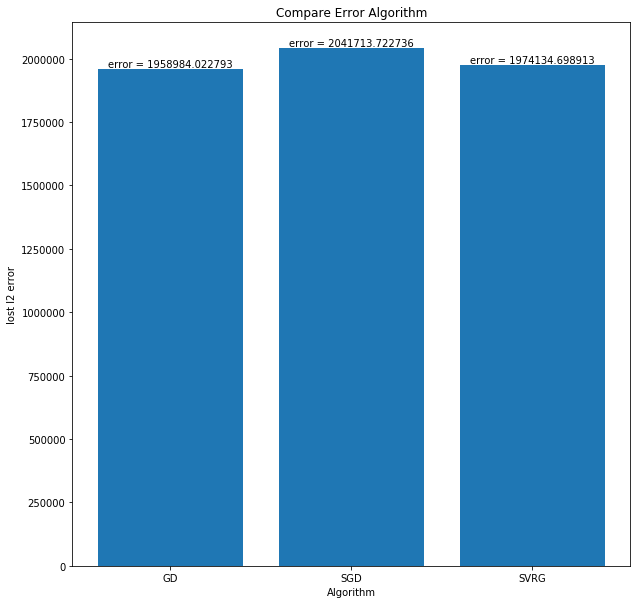

In [464]:
plot_hist(['GD','SGD','SVRG'], [testing_error_l2_gd, testing_error_l2_sgd, testing_error_l2_svrg], "Compare Error Algorithm", "Algorithm", "lost l2 error")